### Load libraries

In [1]:
from parameters import parameters as par
from model import Model
from modules.loader import Loader
from simulator import Simulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.agepolynomial import create_age_poly_array
#import pickle

### Select date and subscript

In [2]:
date = '18-05'
add_text = 'log_3' # Can be empty, pi_0 (currently only for <HS)
educ = ['<HS', 'HS', 'College']
NUMBER_OF_PERSONS = 1000

### Note:
- It is important to change the cost for pi and kappa manually in agent.py such that the costs correspond to the simulated outcome. Unfortunately, these costs weren't stored in the parameters. Keep this in mind. In the ReadMe file in this folder, you can see which costs were chosen.

### Get solution

In [3]:
mean_std = dict()

for ed in educ:
    mean_std[ed] = []
    V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + ed + '/' + date + add_text)
    states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)
    mean_std[ed].append(states[0,40,:].mean())
    mean_std[ed].append(states[0, 40, :].std())

In [4]:
data = {
    'Education': ['< High School', 'High School', 'College'],
    'mean' : [mean_std['<HS'][0], mean_std['HS'][0], mean_std['College'][0]],
    'mean - 2 std' : [mean_std['<HS'][0] - 2*mean_std['<HS'][1], mean_std['HS'][0] - 2*mean_std['HS'][1], mean_std['College'][0] - 2*mean_std['College'][1]],
    'mean + 2 std' : [mean_std['<HS'][0] + 2*mean_std['<HS'][1], mean_std['HS'][0] + 2*mean_std['HS'][1], mean_std['College'][0] + 2*mean_std['College'][1]],
    'Ratio to College': [mean_std['<HS'][0]/mean_std['College'][0], mean_std['HS'][0]/mean_std['College'][0], 1]
}
data = pd.DataFrame(data).round(2)

In [5]:
data

,Education,Ratio to College,mean,mean + 2 std,mean - 2 std
0,< High School,0.37,81318.92,93894.91,68742.93
1,High School,0.59,128635.29,137812.48,119458.10
2,College,1.00,218440.12,245297.75,191582.50


### Look at wealth divided by average lifetime income

In [6]:
wealth_income_ratio = dict()
for ed in educ:
    wealth_income_ratio[ed] = []
    ratio = mean_std[ed][0]/sum(create_age_poly_array(ed))
    wealth_income_ratio[ed].append(ratio)

In [7]:
wealth_income_ratio

{'<HS': [0.04566624419600944],
 'College': [0.07942939624961669],
 'HS': [0.060350599513860514]}

In [12]:
wir_fin_model = {'<HS': [0.04566428104709243],
 'College': [0.12059184361529693],
 'HS': [0.07737256986171517]}

In [13]:
wir_buffer = {'<HS': [0.04566624419600944],
 'College': [0.07942939624961669],
 'HS': [0.060350599513860514]}

### Look at pi_0 case

In [2]:
date = '20-05'
add_text = '300free' # Can be empty, pi_0 (currently only for <HS)
educ = ['<HS']
NUMBER_OF_PERSONS = 1000 

In [3]:
mean_std = dict()

for ed in educ:
    mean_std[ed] = []
    V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + ed + '/' + date + add_text)
    states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)
    mean_std[ed].append(states[0,40,:].mean())
    mean_std[ed].append(states[0, 40, :].std())

In [6]:
wealth_300free_lhs = 82352.607073949

In [7]:
total_inc_lhs = 1780722.6551226806

In [8]:
wealth_pi0_lhs = 111448.14334520085

In [9]:
wealth_income_ratio_lhs_300free = wealth_300free_lhs/total_inc_lhs

In [11]:
wealth_income_ratio_lhs_pi0 = wealth_pi0_lhs/total_inc_lhs

In [14]:
wir_fin_model = {'<HS': [0.04566428104709243],
 'College': [0.12059184361529693],
 'HS': [0.07737256986171517]}

In [15]:
wir_buffer = {'<HS': [0.04566624419600944],
 'College': [0.07942939624961669],
 'HS': [0.060350599513860514]}

### Calculate income ratios

In [17]:
fin_model = 0.12059184361529693/0.04566428104709243
fin_model

2.6408352622684146

In [26]:
lst = []
for i in range(25,65):
    lst.append(300*1.02**(65-i))    

In [27]:
sum(lst)

18483.006853307244

In [21]:
300*1.02**(65-25)

662.4118990844561

In [18]:
buffer_model = 0.07942939624961669/0.04566624419600944
buffer_model

1.7393459358884096

In [19]:
pi_0_model = 0.12059184361529693/wealth_income_ratio_lhs_pi0
pi_0_model

1.9268210443275877

In [20]:
free300_model = 0.12059184361529693/wealth_income_ratio_lhs_300free
free300_model

2.6075753467761262

# Bar plot

In [31]:
# Set path to save picture
pic_path = '/Users/ditlevkf/Ditlev/KU/Kandidaten/DP/Projekt/Code/dypa_termpaper/chapters/'

In [15]:
buffer_stock_wi = 1.7393459358884096
pi_0_wi = 1.9268210204030483
fin_lit_wi = 2.6446

In [16]:
x = np.arange(3)
inequality = [buffer_stock_wi, pi_0_wi, fin_lit_wi]

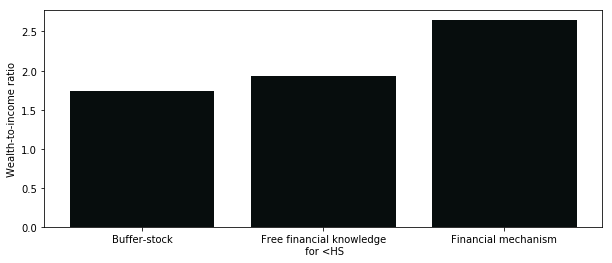

In [32]:
fig, ax = plt.subplots(figsize = (10,4))
plt.bar(x, inequality, color = '#070d0d')
plt.xticks(x, ('Buffer-stock', 'Free financial knowledge\n for <HS', 'Financial mechanism'))
plt.ylabel('Wealth-to-income ratio')
plt.savefig(pic_path + 'wealth_ineq',bbox_inches='tight')
plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()